# Module Assessment

### Setup

Import required packages for effective operation of notebook

In [18]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Creating plots
import matplotlib.pyplot as plt

# Listing data files
import os


### Assessment Tasks

1. Write a function titled get_data() to download previous 5 days for the FAANG stocks
2. Plot the data for each stock
3. Write faang.py script to perform task 1 and 2
4. Create GitHub Actions workflow to run script faang.yml every Saturday morninng

#### Problem 1. Funtion Creation

To create the 'get_data' function, '''yf.download''' will be used, with certain parameters specified, to align with the 5 day look back.

In [19]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head()

/tmp/ipykernel_1968/3428256576.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-21 14:30:00+00:00  269.850006  216.264999  296.760010  585.119995   
2025-11-21 15:30:00+00:00  270.899994  218.574997  300.329987  587.742676   
2025-11-21 16:30:00+00:00  270.549988  219.639999  296.489990  592.979980   
2025-11-21 17:30:00+00:00  270.980011  218.722000  297.290009  591.625000   
2025-11-21 18:30:00+00:00  272.609985  222.050003  302.660095  597.548584   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-21 14:30:00+00:00  105.889999  270.450012  217.910004  301.920013   
2025-11-21 15:30:00+00:00  105.239998  271.470001  218.610001  301.829987   
2025-11-21 16:30:00+00:00  105.220001  271.119995  220.723007  300.375000   
2025-11-21 17:30:00+00:00  104.945000  271.600006  220.085007  298.179993   
2025-11-21 18:30:00+00:00  105.286003  273.315002  222.100006  303.959991   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-21 14:30:00+00:00  596.000000  106.529999  ...  265.880005   
2025-11-21 15:30:00+00:00  587.909973  106.000000  ...  269.790009   
2025-11-21 16:30:00+00:00  593.909302  105.540001  ...  270.890015   
2025-11-21 17:30:00+00:00  595.000000  105.690002  ...  270.630005   
2025-11-21 18:30:00+00:00  598.119995  105.650002  ...  270.980011   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-21 14:30:00+00:00  216.380005  297.290009  588.500000  105.000000   
2025-11-21 15:30:00+00:00  216.270004  296.739990  585.119995  105.889999   
2025-11-21 16:30:00+00:00  218.574997  300.339996  587.799988  105.239998   
2025-11-21 17:30:00+00:00  219.750000  296.584991  593.000122  105.209999   
2025-11-21 18:30:00+00:00  218.710007  297.260010  591.530029  104.930000   

Price                        Volume                                       
Ticker                         AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                  
2025-11-21 14:30:00+00:00  10658658  11194304  9999227  3693066  5084200  
2025-11-21 15:30:00+00:00   4761138   6341071  4010585  2007970  2461936  
2025-11-21 16:30:00+00:00   2949033   6048938  2730646  1489299  2552825  
2025-11-21 17:30:00+00:00   2023820   3049149  1393147  1093645  1815537  
2025-11-21 18:30:00+00:00   3562846   3506398  3613249  1107144  2501464  

[5 rows x 25 columns]

Given the above code can be seen to pull the requested dates; previous 5 days with 1 hour intervals, the following code can then be used to save the information with the required naming convention.

In [20]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes

now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 11, 30, 13, 40, 58, 629825)

This now needs to be converted into a string, and can be done so using '''now.strftime'''
https://www.w3schools.com/python/python_datetime.asp

In [21]:
# Convert date and time into string specifying:
# %Y - for year
# %m - for month

now.strftime('%Y%m%d-%H%M%S')

'20251130-134058'

Merging the above 2 codes will generate the exact time the code is ran, and capture it in a string format. 

In [22]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251130-134058'

This can then be expanded to be used as the filename, along with specifying the location for the file to be saved.

In [23]:
# File location is the 'data' folder, and will be a .csv file.
'../data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'../data/20251130-134058.csv'

All can now be pulled together to save the previous 5 days for the given stocks.

In [24]:
# Save download as a .csv file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder, titling file with time stamp
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

First step is to retreive the data from the latest file in the 'data' folder. This can be done by firstly specifying the directory location (`datadir`), an then chosing the correct filename.

In [25]:
# Specify data folder as location to find the file.
datadir = './data/'

# Specify the filename, which is the same time stamp as when the data is pulled.
filename=f'{time_stamp}.csv'

The CSV file can then be pulled in and plotted.

In [26]:
# Read in the CSV file
df= pd.read_csv(datadir + filename)

#show first 5 rows
df.head()

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-11-21 14:30:00+00:00,269.8500061035156,216.26499938964844,296.760009765625,585.1199951171875,105.88999938964844,270.45001220703125,217.91000366210938,301.9200134277344,596.0,...,265.8800048828125,216.3800048828125,297.2900085449219,588.5,105.0,10658658,11194304,9999227,3693066,5084200
3,2025-11-21 15:30:00+00:00,270.8999938964844,218.5749969482422,300.3299865722656,587.74267578125,105.23999786376953,271.4700012207031,218.61000061035156,301.8299865722656,587.9099731445312,...,269.7900085449219,216.27000427246094,296.739990234375,585.1199951171875,105.88999938964844,4761138,6341071,4010585,2007970,2461936
4,2025-11-21 16:30:00+00:00,270.54998779296875,219.63999938964844,296.489990234375,592.97998046875,105.22000122070312,271.1199951171875,220.72300720214844,300.375,593.9093017578125,...,270.8900146484375,218.5749969482422,300.3399963378906,587.7999877929688,105.23999786376953,2949033,6048938,2730646,1489299,2552825


The above can be seen to have multiple column names which won't be able to be plotted. To do this, the CSV file needs to be read in, specifying the first 2 rows as the columns.

In [27]:
data_files = os.listdir('./data/')

# Show
data_files

['20251130-133818.csv', '20251117-200807.csv', '20251130-134059.csv']

In [28]:
# Sort the list of files.
data_files.sort(reverse=True)

# Show.
data_files[0]

'20251130-134059.csv'

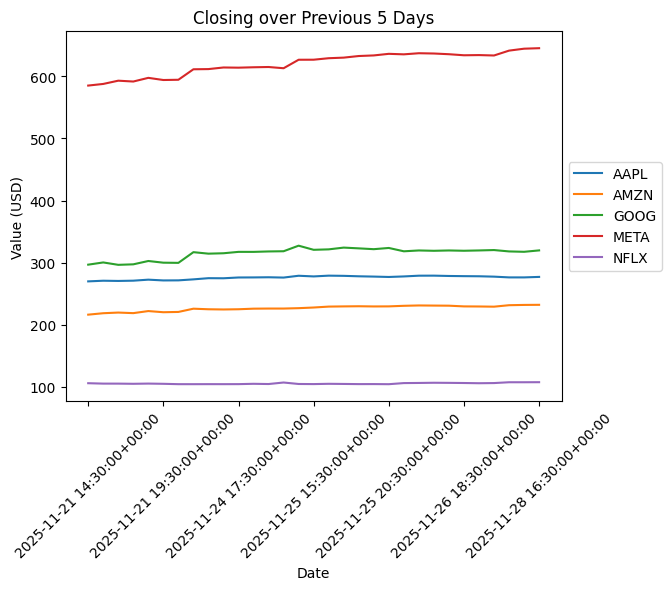

In [29]:
# Specify first file in data_files group
latest = data_files[0]

# Read in the CSV file
# 'header=[0,1]' species the use of row 0 and 1 as the column names
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Plot the 'close' data and adjust visuals.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = df['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')

# Rotate x-axis lables 45°
plt.xticks(rotation=45)

# Move legend off chart area
# Source: https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
plot_data.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Current date & time for plot save file
now = dt.datetime.now()

# File name.
filename = "./plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"

# Save figure.
plt.savefig(filename, dpi=500)

### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three code lines were copied over:
- The first to pull the 5 day, hourly data for each of the stock.
- The second line to generate a timestamp of when ran.
- The final line to save the data into the `data` folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.

This results in the below code.

```python

import datetime as dt

import yfinance as yf

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

get_data.to_csv('data/' + time_stamp + '.csv')

```

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needs to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functions is to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can now be ran in the terminal by simply typing `./faang.py`.

# End